We are an agency helping our customers purchase XoX (a made-up product) from various makers. Price is one of the most important things we care about. We need to estimate the price of a XoX before we recommend it to our customers. However, the estimations vary significantly with our employees' experience. 

We would like you to build a machine learning model to accurately predict the price for a future purchase and provide insights to help us explain the predicted price to our customers. Please note that neither our customers nor us have any knowledge about machine learning. A sample of our sales record is available in ../data/sales.csv.


1. Preprocess, clean, analyze and visualized the provided data. A few sentences or plots describing your approach will suffice. Any thing you would like us to know about the price?
2. Build a machine learning model to help us determine the price for a purchase. Discuss why you choose the approaches, what alternatives you consider, and any concerns you have. How is the performance of your model?
3. Help us understand how the price is predicted (again, a few sentences will suffice).

## 1. Pre-model Analysis<font size="3">: process and visualize data; get insights of features and target</font><br>

### 1.1 Import dataframe and check the data structure

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/sales.csv')

In [3]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


### 1.2 There are 11 coloums in the dataframe. The columns cost, price, weight, height, width and depth can be transformed into numerical features, purchase_date can be transformed into time feature, while the others are all catergorical features.<br>
<font size="3">**The earliest record is 1996-08-09 and the latest record is 2017-10-06.<br>
The amount of different values in each catergorical features are listed in the table below.**<br></font>

| product_levels | product_types | makers | ingredients |
| --- | --- | --- | --- |
| 5 | 22 | 882 | 2036 |

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3197 entries, 0 to 3196
Data columns (total 11 columns):
cost             2216 non-null object
price            3186 non-null object
weight           3193 non-null object
purchase_date    3196 non-null object
product_type     3196 non-null object
product_level    3196 non-null object
maker            2373 non-null object
ingredient       2941 non-null object
height           3197 non-null object
width            3193 non-null object
depth            3193 non-null object
dtypes: object(11)
memory usage: 274.9+ KB


In [5]:
print("There are " + str(len(df.product_level.unique())-1) + " product_level, " + 
      str(len(df.product_type.str.get_dummies(sep=',').columns)-1) + " product_types, " +
      str(len(df.maker.unique())-1) + " makers, and " +
      str(len(df.ingredient.str.get_dummies(sep=',').columns)-1) + " ingredients.")

There are 5 product_level, 22 product_types, 882 makers, and 2036 ingredients.


In [6]:
purchase_date = pd.to_datetime(df.purchase_date)
print("The earliest record is " + str(min(purchase_date)) + " and the latest record is " + str(max(purchase_date)))

The earliest record is 1996-08-09 00:00:00 and the latest record is 2017-10-06 00:00:00


### 1.3 Transform and visualize the numerica features

In [7]:
import re
def price2num(x):
    if type(x) == str: 
        x = x.strip('$').replace(',','')
    return float(x)

def cost2num(x):
    if type(x) == str: 
        x = x.strip('$').strip('k')
        return float(x)*1000
    else:
        return x

def weight2num(x):
    if type(x) == str:
        temp = re.findall(r'\d+', x)
        res = list(map(int, temp))
        ton = res[0]
        kg = res[1]
        x = ton*1000 + kg
    return float(x)

def height2num(x):
    if type(x) == str: 
        x = x.strip('meters')
    return float(x)*100

def width2num(x):
    if type(x) == str:
        x = x.strip('cm')
    return float(x)

def depth2num(x):
    if type(x) is str:
        x = x.strip('cm')
    return float(x)

df['price'] = df.price.map(price2num)
df['cost'] = df.cost.map(cost2num)
df['weight'] = df.weight.map(weight2num)
df['height'] = df.height.map(height2num)
df['width'] = df.width.map(width2num)
df['depth'] = df.depth.map(depth2num)

df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,333000.0,300492.0,3090.0,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",276.0,97.0,26.0
1,NaN,430570.0,3030.0,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",267.0,98.0,26.0
2,270000.0,213070.0,3040.0,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",300.0,93.0,24.0
3,NaN,229174.0,3050.0,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",250.0,102.0,27.0
4,97000.0,122659.0,2970.0,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",247.0,101.0,26.0


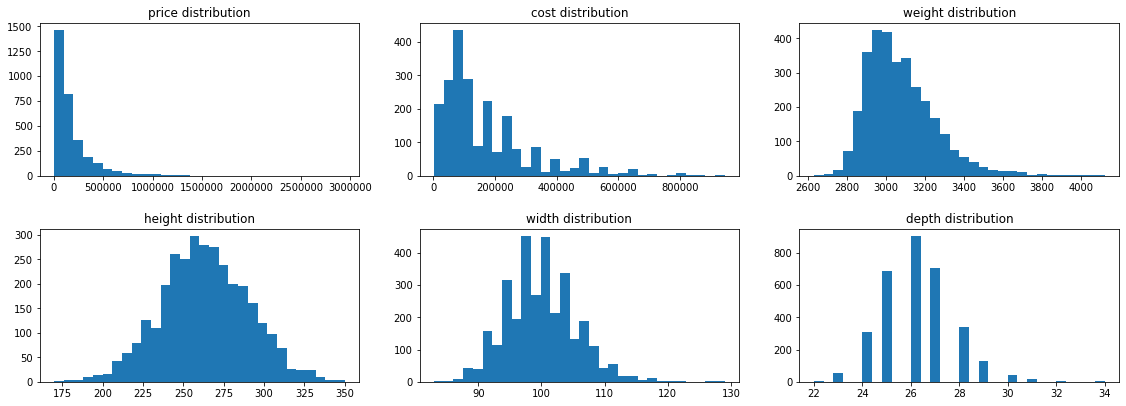

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(16,6))
ax1.hist(df.price, bins=30)
ax1.set_title('price distribution')
ax2.hist(df.cost, bins=30)
ax2.set_title('cost distribution')
ax3.hist(df.weight, bins=30)
ax3.set_title('weight distribution')
ax4.hist(df.height, bins=30)
ax4.set_title('height distribution')
ax5.hist(df.width, bins=30)
ax5.set_title('width distribution')
ax6.hist(df.depth, bins=30)
ax6.set_title('depth distribution')
fig.tight_layout(pad=2.0)
plt.show()

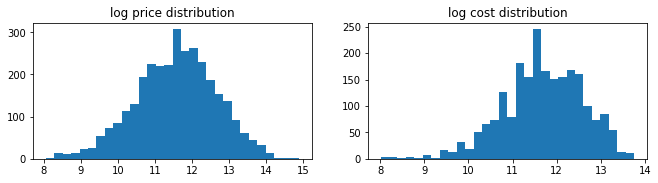

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11,2.5))
ax1.hist(df.price.map(np.log), bins=30)
ax1.set_title('log price distribution')
ax2.hist(df.cost.map(np.log), bins=30)
ax2.set_title('log cost distribution')
plt.show()

<font size="3">**As shown above, among the numerical columns, weight, height, depth and width are normally distributed but not price and cost. Using log can make the distribution of price and cost normal.**</font>

## 2. Problem Definition<font size="3">: translate the business needs into ml problems; design metrics to measure model performance</font><br>
<font size="3">**All of the data will be transformed into type which can be used in ml and the MAE, MSE and r2 metrics used to measure model performance.**</font>

## 3. Feature Engineering<font size="3">: create features which might improve model performance</font><br>

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### 3.1 There are only 11 records with miss price, so we can just drop them.

In [11]:
df.dropna(subset=['price'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 11 columns):
cost             2211 non-null float64
price            3186 non-null float64
weight           3183 non-null float64
purchase_date    3186 non-null object
product_type     3186 non-null object
product_level    3186 non-null object
maker            2365 non-null object
ingredient       2932 non-null object
height           3183 non-null float64
width            3183 non-null float64
depth            3183 non-null float64
dtypes: float64(6), object(5)
memory usage: 273.9+ KB


### 3.2 Fill in missing values in the numerical columns with their means.

In [12]:
class Numerical_Transformer(object):
    
    def fit(self, X, y=None):
        df['cost'] = X.cost.map(self.cost2num)
        df['weight'] = X.weight.map(self.weight2num)
        df['height'] = X.height.map(self.height2num)
        df['width'] = X.width.map(self.width2num)
        df['depth'] = X.depth.map(self.depth2num)
        self.mean = df.mean()
        
    def transform(self, X, y=None):
        df['cost'] = X.cost.map(self.cost2num)
        df['weight'] = X.weight.map(self.weight2num)
        df['height'] = X.height.map(self.height2num)
        df['width'] = X.width.map(self.width2num)
        df['depth'] = X.depth.map(self.depth2num)
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)


    def cost2num(self, x):
        if type(x) == str: 
            x = x.strip('$').strip('k')
            return float(x)*1000
        else:
            return x

    def weight2num(self, x):
        if type(x) == str:
            temp = re.findall(r'\d+', x)
            res = list(map(int, temp))
            ton = res[0]
            kg = res[1]
            x = ton*1000 + kg
        return float(x)

    def height2num(self, x):
        if type(x) == str: 
            x = x.strip('meters')
        return float(x)*100

    def width2num(self, x):
        if type(x) == str:
            x = x.strip('cm')
        return float(x)

    def depth2num(self, x):
        if type(x) is str:
            x = x.strip('cm')
        return float(x)

In [13]:
ntf = Numerical_Transformer()

In [14]:
df = ntf.fit_transform(df)
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,333000.000000,300492.0,3090.0,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2760000.0,97.0,26.0
1,169019.448213,430570.0,3030.0,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2670000.0,98.0,26.0
2,270000.000000,213070.0,3040.0,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3000000.0,93.0,24.0
3,169019.448213,229174.0,3050.0,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2500000.0,102.0,27.0
4,97000.000000,122659.0,2970.0,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2470000.0,101.0,26.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 11 columns):
cost             3186 non-null float64
price            3186 non-null float64
weight           3186 non-null float64
purchase_date    3186 non-null object
product_type     3186 non-null object
product_level    3186 non-null object
maker            2365 non-null object
ingredient       2932 non-null object
height           3186 non-null float64
width            3186 non-null float64
depth            3186 non-null float64
dtypes: float64(6), object(5)
memory usage: 273.9+ KB


### 3.3 The the values in product_level are ranked and  represented by ordinal numbers.

In [16]:
class Ordinal_Transformer(object):
    
    def fit(self, X, y=None):
        self.freq_dict = {'super advanced': 4,
                          'advanced': 3,
                          'intermediate': 2,
                          'basic': 1, 
                          'unrated': -1}
    
    def transform(self, X, y=None):
        res = {'ordinal': []} 
        for item in X:
            if item in self.freq_dict:
                res['ordinal'].append(self.freq_dict[item])
            else:
                res['ordinal'].append(-1)
        return pd.DataFrame(res)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [17]:
otf = Ordinal_Transformer()

In [18]:
df['product_level'] = otf.fit_transform(df.product_level)
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,333000.000000,300492.0,3090.0,Dec 19 2008,"Q,B",3,M14122,"IN732052,IN732053",2760000.0,97.0,26.0
1,169019.448213,430570.0,3030.0,Sep 10 1997,"J,D",1,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2670000.0,98.0,26.0
2,270000.000000,213070.0,3040.0,Sep 05 2001,"J,D",1,NaN,"IN732054,IN732059,IN732060",3000000.0,93.0,24.0
3,169019.448213,229174.0,3050.0,Dec 23 2016,U,3,M14123,"IN732061,IN732062,IN732063",2500000.0,102.0,27.0
4,97000.000000,122659.0,2970.0,Jan 12 2000,"D,R",3,NaN,"IN732064,IN732065,IN732066",2470000.0,101.0,26.0


### 3.4 Generate new columns year, month, weekday and day based on purchase_date.

In [19]:
class date_Transformer(object):
        
    def transform(self, X, y=None):
        df['year'] = pd.to_datetime(X.purchase_date).dt.year
        df['month'] = pd.to_datetime(X.purchase_date).dt.month
        df['weekday'] = pd.to_datetime(X.purchase_date).dt.weekday
        df['day'] = pd.to_datetime(X.purchase_date).dt.day
        return df
    
    def fit_transform(self, X, y=None):
        return self.transform(X)

In [20]:
dtf = date_Transformer()
dtf.fit_transform(df).head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year,month,weekday,day
0,333000.000000,300492.0,3090.0,Dec 19 2008,"Q,B",3,M14122,"IN732052,IN732053",2760000.0,97.0,26.0,2008,12,4,19
1,169019.448213,430570.0,3030.0,Sep 10 1997,"J,D",1,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2670000.0,98.0,26.0,1997,9,2,10
2,270000.000000,213070.0,3040.0,Sep 05 2001,"J,D",1,NaN,"IN732054,IN732059,IN732060",3000000.0,93.0,24.0,2001,9,2,5
3,169019.448213,229174.0,3050.0,Dec 23 2016,U,3,M14123,"IN732061,IN732062,IN732063",2500000.0,102.0,27.0,2016,12,4,23
4,97000.000000,122659.0,2970.0,Jan 12 2000,"D,R",3,NaN,"IN732064,IN732065,IN732066",2470000.0,101.0,26.0,2000,1,2,12


### 3.5 Since price and cost don't show normal distribution, a dataframe with log_cost and log_price is generated to test whether it helps train the model.

In [21]:
df['log_cost'] = np.log(df['cost'])
df['log_price'] = np.log(df['price'])

In [22]:
df = df[['purchase_date', 'year', 'month', 'weekday', 'day', 'price', 'log_price', 'cost', 'log_cost', 'weight', 
         'height', 'width', 'depth', 'product_level', 'product_type', 'maker', 'ingredient']]
df.head()

,purchase_date,year,month,weekday,day,price,log_price,cost,log_cost,weight,height,width,depth,product_level,product_type,maker,ingredient
0,Dec 19 2008,2008,12,4,19,300492.0,12.613176,333000.000000,12.715898,3090.0,2760000.0,97.0,26.0,3,"Q,B",M14122,"IN732052,IN732053"
1,Sep 10 1997,1997,9,2,10,430570.0,12.972865,169019.448213,12.037769,3030.0,2670000.0,98.0,26.0,1,"J,D",NaN,"IN732054,IN732055,IN732056,IN732057,IN732058"
2,Sep 05 2001,2001,9,2,5,213070.0,12.269376,270000.000000,12.506177,3040.0,3000000.0,93.0,24.0,1,"J,D",NaN,"IN732054,IN732059,IN732060"
3,Dec 23 2016,2016,12,4,23,229174.0,12.342237,169019.448213,12.037769,3050.0,2500000.0,102.0,27.0,3,U,M14123,"IN732061,IN732062,IN732063"
4,Jan 12 2000,2000,1,2,12,122659.0,11.717163,97000.000000,11.482466,2970.0,2470000.0,101.0,26.0,3,"D,R",NaN,"IN732064,IN732065,IN732066"


### 3.6 We will transform the rest features, product_type, maker and ingredient into dummy variables.

In [23]:
class Dummy_Transformer(object):
    
    def fit(self, X, y=None):
        type = []
        for i in X.tolist():
            type.extend(i.split(','))
        self.keys = set(type)
    
    def transform(self, X, y=None):
        res = {} #result
        for key in self.keys:
            res[key] = [0]*len(X)    
        for i, item in enumerate(X):
            if item in self.keys:
                res[item][i] = 1
            if item not in self.keys:
                res[item.split(',')[0]][i] =1
                res[item.split(',')[1]][i] =1
        return pd.DataFrame(res)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X) 

In [24]:
dtf = Dummy_Transformer()

In [25]:
print("Dummy product_type")
df_ptype = dtf.fit_transform(df.product_type)
df_ptype.head()

Dummy product_type


,N,L,E,T,M,O,A,P,I,V,...,K,F,H,W,D,G,J,R,B,Q
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [26]:
print("Dummy maker")
maker = df['maker'].fillna('unknown_maker')
vectorizer = CountVectorizer()
vectorizer.fit(maker)
maker= vectorizer.transform(maker)
df_maker= pd.DataFrame(maker.todense())
df_maker.columns = vectorizer.get_feature_names()
df_maker.head()

Dummy maker


,m14122,m14123,m14124,m14125,m14126,m14127,m14128,m14129,m14130,m14131,...,m15004,m15005,m15006,m15007,m15008,m15009,m15010,m15011,m15012,unknown_maker
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
print("Dummy ingredient")
ingredient = df['ingredient'].fillna('unknown_ingredient')
vectorizer = CountVectorizer()
vectorizer.fit(ingredient)
ingredient= vectorizer.transform(ingredient)
df_ingredient= pd.DataFrame(ingredient.todense())
df_ingredient.columns = vectorizer.get_feature_names()
df_ingredient.head()

Dummy ingredient


,in732052,in732053,in732054,in732055,in732056,in732057,in732058,in732059,in732060,in732061,...,in734080,in734081,in734082,in734083,in734084,in734085,in734086,in734087,in734088,unknown_ingredient
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df = pd.concat([df, df_ptype, df_maker, df_ingredient], axis=1).drop(['purchase_date', 'maker','ingredient',
                                                                      'product_type'],axis = 1)
df.head()

,year,month,weekday,day,price,log_price,cost,log_cost,weight,height,...,in734080,in734081,in734082,in734083,in734084,in734085,in734086,in734087,in734088,unknown_ingredient
0,2008,12,4,19,300492.0,12.613176,333000.000000,12.715898,3090.0,2760000.0,...,0,0,0,0,0,0,0,0,0,0
1,1997,9,2,10,430570.0,12.972865,169019.448213,12.037769,3030.0,2670000.0,...,0,0,0,0,0,0,0,0,0,0
2,2001,9,2,5,213070.0,12.269376,270000.000000,12.506177,3040.0,3000000.0,...,0,0,0,0,0,0,0,0,0,0
3,2016,12,4,23,229174.0,12.342237,169019.448213,12.037769,3050.0,2500000.0,...,0,0,0,0,0,0,0,0,0,0
4,2000,1,2,12,122659.0,11.717163,97000.000000,11.482466,2970.0,2470000.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_log = df.drop(['price', 'cost'], axis = 1)
df_log.shape

(3186, 2959)

In [30]:
df1 = df.drop(['log_price', 'log_cost'], axis = 1)
df1.shape

(3186, 2959)

## 4. Modeling<font size="3">: Model selection, feature elimination, validation, hyperparameter tuning</font><br>

### 4.1 The data will be split into two groups: one for model training and the other for model testing.

In [31]:
train_raw = df1[df1.year < 2015].reset_index(drop=True)
test_raw = df1[df1.year >= 2015].reset_index(drop=True)

log_train_raw = df_log[df_log.year < 2015].reset_index(drop=True)
log_test_raw = df_log[df_log.year >= 2015].reset_index(drop=True)

In [32]:
train_raw.head(3)

,year,month,weekday,day,price,cost,weight,height,width,depth,...,in734080,in734081,in734082,in734083,in734084,in734085,in734086,in734087,in734088,unknown_ingredient
0,2008,12,4,19,300492.0,333000.000000,3090.0,2760000.0,97.0,26.0,...,0,0,0,0,0,0,0,0,0,0
1,1997,9,2,10,430570.0,169019.448213,3030.0,2670000.0,98.0,26.0,...,0,0,0,0,0,0,0,0,0,0
2,2001,9,2,5,213070.0,270000.000000,3040.0,3000000.0,93.0,24.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
log_train_raw.head(3)

,year,month,weekday,day,log_price,log_cost,weight,height,width,depth,...,in734080,in734081,in734082,in734083,in734084,in734085,in734086,in734087,in734088,unknown_ingredient
0,2008,12,4,19,12.613176,12.715898,3090.0,2760000.0,97.0,26.0,...,0,0,0,0,0,0,0,0,0,0
1,1997,9,2,10,12.972865,12.037769,3030.0,2670000.0,98.0,26.0,...,0,0,0,0,0,0,0,0,0,0
2,2001,9,2,5,12.269376,12.506177,3040.0,3000000.0,93.0,24.0,...,0,0,0,0,0,0,0,0,0,0


### 4.2 There are too many features, and PCA will be used to reduce dimension.

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Columns: 2959 entries, year to unknown_ingredient
dtypes: float64(6), int64(2953)
memory usage: 71.9 MB


In [35]:
features = list(train_raw.columns)
target = 'price'
features.remove(target)

log_features = list(log_train_raw.columns)
log_target = 'log_price'
log_features.remove(log_target)

In [36]:
X_train = train_raw[features]
y_train = train_raw[target]
X_test = test_raw[features]
y_test = test_raw[target]

log_X_train = log_train_raw[log_features]
log_y_train = log_train_raw[log_target]
log_X_test = log_test_raw[log_features]
log_y_test = log_test_raw[log_target]

In [37]:
steps = [('rescale', MinMaxScaler()),
         ('pca', PCA(n_components = 1200))]
pipe = Pipeline(steps)
X_train_pca = pipe.fit(X_train)

steps = [('rescale', MinMaxScaler()),
         ('pca', PCA(n_components = 1200))]
pipe = Pipeline(steps)
log_X_train_pca = pipe.fit(log_X_train)

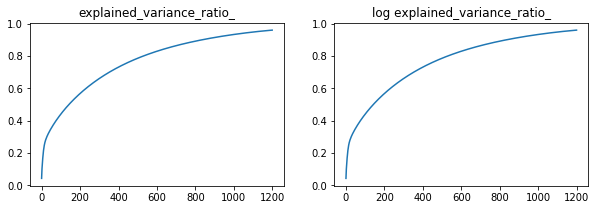

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.plot(np.cumsum(X_train_pca.steps[1][1].explained_variance_ratio_))
ax1.set_title('explained_variance_ratio_')
ax2.plot(np.cumsum(log_X_train_pca.steps[1][1].explained_variance_ratio_))
ax2.set_title('log explained_variance_ratio_')
plt.show()

<font size="3">**It seems that the n_components need to be around 500, which is very high. However, our dataframe is small and we still can make models based on it.**</font>

### 4.3 We will generate three different models and tune the n_components for PCA.

**4.3.1 Linear regression model: n_coms = range(1, 600, 30)**

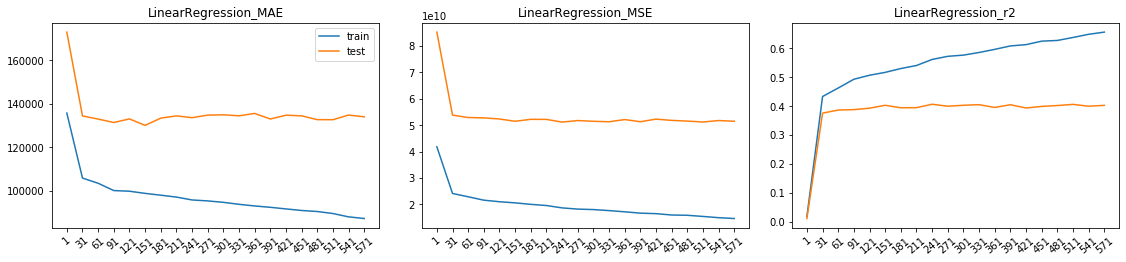

In [39]:
train_MAE = []
train_MSE = []
train_r2 = []
test_MAE = []
test_MSE = []
test_r2 = []
n_coms = range(1, 600, 30)
for n_com in n_coms:
    steps = [('rescale', MinMaxScaler()),
             ('pca', PCA(n_components = n_com)),
             ('lr', LinearRegression())]
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_MAE.append(mean_absolute_error(y_train, y_train_pred))
    train_MSE.append(mean_squared_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))
    test_MSE.append(mean_squared_error(y_test, y_test_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.plot(n_coms, train_MAE)
ax1.plot(n_coms, test_MAE)
ax1.set_xticks(n_coms)
ax1.set_xticklabels(n_coms, rotation=40)
ax1.set_title('LinearRegression_MAE')
ax1.legend(['train', 'test'], loc='upper right')
ax2.plot(n_coms, train_MSE)
ax2.plot(n_coms, test_MSE)
ax2.set_xticks(n_coms)
ax2.set_xticklabels(n_coms, rotation=40)
ax2.set_title('LinearRegression_MSE')
ax3.plot(n_coms, train_r2)
ax3.plot(n_coms, test_r2)
ax3.set_xticks(n_coms)
ax3.set_xticklabels(n_coms, rotation=40)
ax3.set_title('LinearRegression_r2')
fig.tight_layout(pad=2.0)

**4.3.2 Random Forest model: n_coms = range(1, 80, 5)**

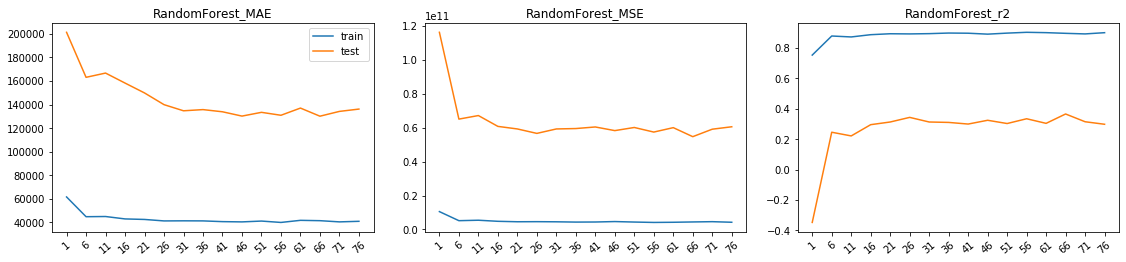

In [40]:
train_MAE = []
train_MSE = []
train_r2 = []
test_MAE = []
test_MSE = []
test_r2 = []
n_coms = range(1, 80, 5)
for n_com in n_coms:
    steps = [('rescale', MinMaxScaler()),
             ('pca', PCA(n_components = n_com)),
             ('rfr', RandomForestRegressor())]
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_MAE.append(mean_absolute_error(y_train, y_train_pred))
    train_MSE.append(mean_squared_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))
    test_MSE.append(mean_squared_error(y_test, y_test_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.plot(n_coms, train_MAE)
ax1.plot(n_coms, test_MAE)
ax1.set_xticks(n_coms)
ax1.set_xticklabels(n_coms, rotation=40)
ax1.set_title('RandomForest_MAE')
ax1.legend(['train', 'test'], loc='upper right')
ax2.plot(n_coms, train_MSE)
ax2.plot(n_coms, test_MSE)
ax2.set_xticks(n_coms)
ax2.set_xticklabels(n_coms, rotation=40)
ax2.set_title('RandomForest_MSE')
ax3.plot(n_coms, train_r2)
ax3.plot(n_coms, test_r2)
ax3.set_xticks(n_coms)
ax3.set_xticklabels(n_coms, rotation=40)
ax3.set_title('RandomForest_r2')
fig.tight_layout(pad=2.0)

**4.3.3 XGBoost model: n_coms = range(1, 80, 5)**

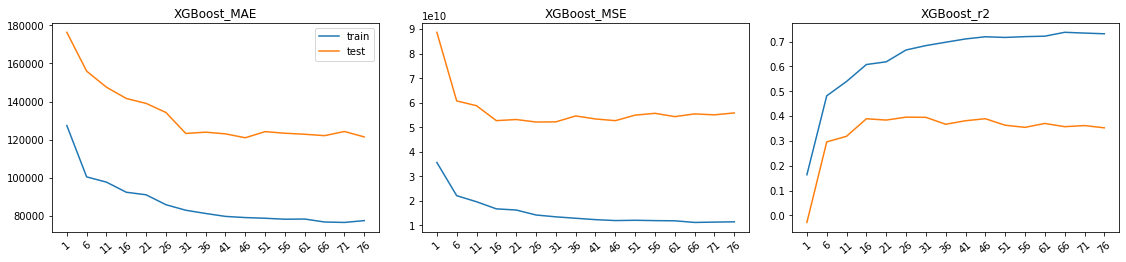

In [41]:
train_MAE = []
train_MSE = []
train_r2 = []
test_MAE = []
test_MSE = []
test_r2 = []
n_coms = range(1, 80, 5)
for n_com in n_coms:
    steps = [('rescale', MinMaxScaler()),
             ('pca', PCA(n_components = n_com)),
             ('xgb', XGBRegressor(silent=True))]
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_MAE.append(mean_absolute_error(y_train, y_train_pred))
    train_MSE.append(mean_squared_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))
    test_MSE.append(mean_squared_error(y_test, y_test_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.plot(n_coms, train_MAE)
ax1.plot(n_coms, test_MAE)
ax1.set_xticks(n_coms)
ax1.set_xticklabels(n_coms, rotation=40)
ax1.set_title('XGBoost_MAE')
ax1.legend(['train', 'test'], loc='upper right')
ax2.plot(n_coms, train_MSE)
ax2.plot(n_coms, test_MSE)
ax2.set_xticks(n_coms)
ax2.set_xticklabels(n_coms, rotation=40)
ax2.set_title('XGBoost_MSE')
ax3.plot(n_coms, train_r2)
ax3.plot(n_coms, test_r2)
ax3.set_xticks(n_coms)
ax3.set_xticklabels(n_coms, rotation=40)
ax3.set_title('XGBoost_r2')
fig.tight_layout(pad=2.0)

<font size="3">**Among the three models above, XGBoost shows the best performance**</font>

### 4.4 Look closer and find the best n_component.

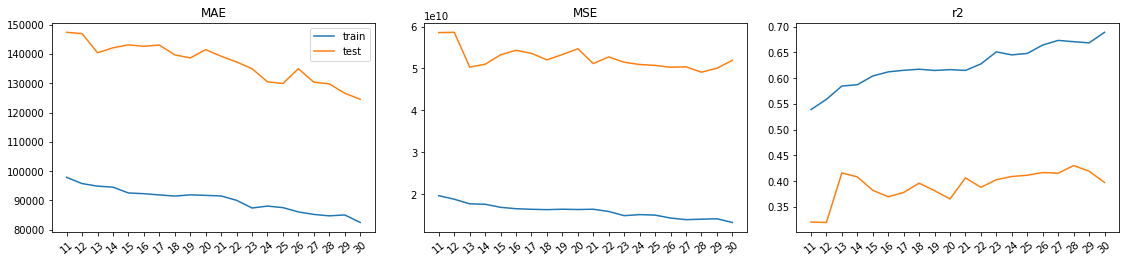

In [42]:
train_MAE = []
train_MSE = []
train_r2 = []
test_MAE = []
test_MSE = []
test_r2 = []
n_coms = range(11, 31)
for n_com in n_coms:
    steps = [('rescale', MinMaxScaler()),
             ('pca', PCA(n_components = n_com)),
             ('xgb', XGBRegressor(silent=True))]
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_MAE.append(mean_absolute_error(y_train, y_train_pred))
    train_MSE.append(mean_squared_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))
    test_MSE.append(mean_squared_error(y_test, y_test_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.plot(n_coms, train_MAE)
ax1.plot(n_coms, test_MAE)
ax1.set_xticks(n_coms)
ax1.set_xticklabels(n_coms, rotation=40)
ax1.set_title('MAE')
ax1.legend(['train', 'test'], loc='upper right')
ax2.plot(n_coms, train_MSE)
ax2.plot(n_coms, test_MSE)
ax2.set_xticks(n_coms)
ax2.set_xticklabels(n_coms, rotation=40)
ax2.set_title('MSE')
ax3.plot(n_coms, train_r2)
ax3.plot(n_coms, test_r2)
ax3.set_xticks(n_coms)
ax3.set_xticklabels(n_coms, rotation=40)
ax3.set_title('r2')
fig.tight_layout(pad=2.0)

<font size="3">**The model shows best performance when n_components=3.**</font>

In [43]:
steps = [('rescale', MinMaxScaler()),
         ('pca', PCA(n_components = 13)),
         ('xgb', XGBRegressor(silent=True))]
model = Pipeline(steps)

In [44]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 9.48e+04
train MSE: 1.77e+10
train R2: 0.584


In [45]:
y_test_pred = model.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.40e+05
test MSE: 5.00e+10
test R2: 0.420


### 4.5 Tried to tune the hyperparameters but found that the model with default parameters shows better performance.

**4.5.1 XGBoost model: alphas = range(1, 15)**

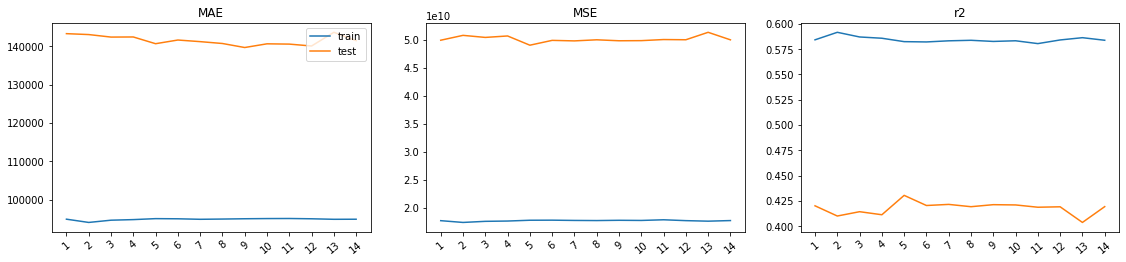

In [46]:
train_MAE = []
train_MSE = []
train_r2 = []
test_MAE = []
test_MSE = []
test_r2 = []
alphas = range(1, 15)
for alpha in alphas:
    steps = [('rescale', MinMaxScaler()),
             ('pca', PCA(n_components = 13)),
             ('xgb', XGBRegressor(alpha=alpha, silent=True))]
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_MAE.append(mean_absolute_error(y_train, y_train_pred))
    train_MSE.append(mean_squared_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))
    test_MSE.append(mean_squared_error(y_test, y_test_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.plot(alphas, train_MAE)
ax1.plot(alphas, test_MAE)
ax1.set_xticks(alphas)
ax1.set_xticklabels(alphas, rotation=40)
ax1.set_title('MAE')
ax1.legend(['train', 'test'], loc='upper right')
ax2.plot(alphas, train_MSE)
ax2.plot(alphas, test_MSE)
ax2.set_xticks(alphas)
ax2.set_xticklabels(alphas, rotation=40)
ax2.set_title('MSE')
ax3.plot(alphas, train_r2)
ax3.plot(alphas, test_r2)
ax3.set_xticks(alphas)
ax3.set_xticklabels(alphas, rotation=40)
ax3.set_title('r2')
fig.tight_layout(pad=2.0)

**4.5.2 XGBoost model: max_depths = range(1, 15)**

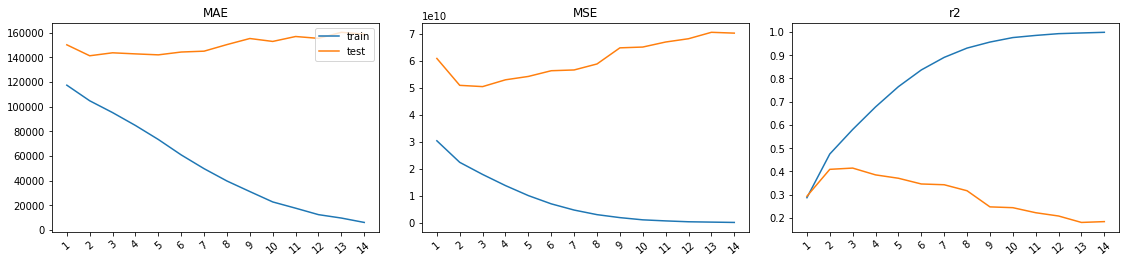

In [47]:
train_MAE = []
train_MSE = []
train_r2 = []
test_MAE = []
test_MSE = []
test_r2 = []
max_depths = range(1, 15)
for max_depth in max_depths:
    steps = [('rescale', MinMaxScaler()),
             ('pca', PCA(n_components = 13)),
             ('xgb', XGBRegressor(max_depth=max_depth, silent=True))]
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_MAE.append(mean_absolute_error(y_train, y_train_pred))
    train_MSE.append(mean_squared_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))
    test_MSE.append(mean_squared_error(y_test, y_test_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.plot(max_depths, train_MAE)
ax1.plot(max_depths, test_MAE)
ax1.set_xticks(max_depths)
ax1.set_xticklabels(max_depths, rotation=40)
ax1.set_title('MAE')
ax1.legend(['train', 'test'], loc='upper right')
ax2.plot(max_depths, train_MSE)
ax2.plot(max_depths, test_MSE)
ax2.set_xticks(max_depths)
ax2.set_xticklabels(max_depths, rotation=40)
ax2.set_title('MSE')
ax3.plot(max_depths, train_r2)
ax3.plot(max_depths, test_r2)
ax3.set_xticks(max_depths)
ax3.set_xticklabels(max_depths, rotation=40)
ax3.set_title('r2')
fig.tight_layout(pad=2.0)

**4.5.3 XGBoost model: min_child_weight = range(1, 15)**

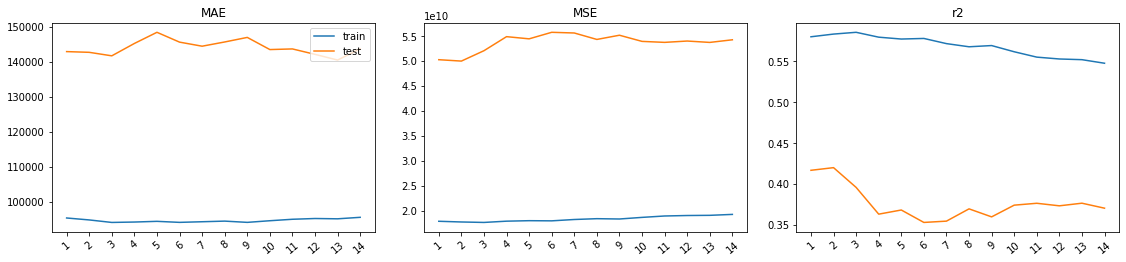

In [48]:
train_MAE = []
train_MSE = []
train_r2 = []
test_MAE = []
test_MSE = []
test_r2 = []
min_child_weights = range(1, 15)
for min_child_weight in min_child_weights:
    steps = [('rescale', MinMaxScaler()),
             ('pca', PCA(n_components = 13)),
             ('xgb', XGBRegressor(min_child_weight=min_child_weight, silent=True))]
    model = Pipeline(steps)
    model = model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    train_MAE.append(mean_absolute_error(y_train, y_train_pred))
    train_MSE.append(mean_squared_error(y_train, y_train_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    y_test_pred = model.predict(X_test)
    test_MAE.append(mean_absolute_error(y_test, y_test_pred))
    test_MSE.append(mean_squared_error(y_test, y_test_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
ax1.plot(min_child_weights, train_MAE)
ax1.plot(min_child_weights, test_MAE)
ax1.set_xticks(min_child_weights)
ax1.set_xticklabels(min_child_weights, rotation=40)
ax1.set_title('MAE')
ax1.legend(['train', 'test'], loc='upper right')
ax2.plot(min_child_weights, train_MSE)
ax2.plot(min_child_weights, test_MSE)
ax2.set_xticks(min_child_weights)
ax2.set_xticklabels(min_child_weights, rotation=40)
ax2.set_title('MSE')
ax3.plot(min_child_weights, train_r2)
ax3.plot(min_child_weights, test_r2)
ax3.set_xticks(min_child_weights)
ax3.set_xticklabels(min_child_weights, rotation=40)
ax3.set_title('r2')
fig.tight_layout(pad=2.0)

In [49]:
steps = [('rescale', MinMaxScaler()),
         ('pca', PCA(n_components = 13)),
         ('xgb', XGBRegressor(min_child_weight=1, max_depth = 2, alpha = 5, silent=True))]
model = Pipeline(steps)

In [50]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print('train MAE: {0:.2e}'.format(mean_absolute_error(y_train, y_train_pred)))
print('train MSE: {0:.2e}'.format(mean_squared_error(y_train, y_train_pred)))
print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))

train MAE: 1.05e+05
train MSE: 2.25e+10
train R2: 0.472


In [51]:
y_test_pred = model.predict(X_test)
print('test MAE: {0:.2e}'.format(mean_absolute_error(y_test, y_test_pred)))
print('test MSE: {0:.2e}'.format(mean_squared_error(y_test, y_test_pred)))
print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))

test MAE: 1.42e+05
test MSE: 5.04e+10
test R2: 0.415


## 5. Post-model Analysis<font size="3">: Model performance, feature importance, actionable suggestions to business</font>

### 5.1 Model performance

In [52]:
steps = [('rescale', MinMaxScaler()),
         ('pca', PCA(n_components = 13)),
         ('xgb', XGBRegressor(silent=True))]
model = Pipeline(steps)

In [53]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f"Train Loss | \tMAE: {mean_absolute_error(y_train, y_train_pred):.2e}"
      f"\tMSE:  {mean_squared_error(y_train, y_train_pred):.2e}"
      f"\tR^2:  {r2_score(y_train, y_train_pred):.4f}")
print(f"Test Loss | \tMAE: {mean_absolute_error(y_test, y_test_pred):.2e}"
      f"\tMSE:  {mean_squared_error(y_test, y_test_pred):.2e}"
      f"\tR^2:  {r2_score(y_test, y_test_pred):.4f}")

Train Loss | 	MAE: 9.44e+04	MSE:  1.75e+10	R^2:  0.5891
Test Loss | 	MAE: 1.40e+05	MSE:  4.96e+10	R^2:  0.4247


### 5.2 Feature importance

In [54]:
importances = model.steps[2][1].feature_importances_
importances

array([0.04955501, 0.15375717, 0.11737379, 0.08742431, 0.18698864,
       0.03527663, 0.02468542, 0.041829  , 0.04067926, 0.07549764,
       0.04362497, 0.05266838, 0.09063981], dtype=float32)

In [65]:
steps = [('rescale', MinMaxScaler()),
         ('pca', PCA(n_components = 20)),
         ('xgb', XGBRegressor(silent=True))]
model = Pipeline(steps)

In [66]:
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(f"Train Loss | \tMAE: {mean_absolute_error(y_train, y_train_pred):.2e}"
      f"\tMSE:  {mean_squared_error(y_train, y_train_pred):.2e}"
      f"\tR^2:  {r2_score(y_train, y_train_pred):.4f}")
print(f"Test Loss | \tMAE: {mean_absolute_error(y_test, y_test_pred):.2e}"
      f"\tMSE:  {mean_squared_error(y_test, y_test_pred):.2e}"
      f"\tR^2:  {r2_score(y_test, y_test_pred):.4f}")

Train Loss | 	MAE: 9.09e+04	MSE:  1.61e+10	R^2:  0.6213
Test Loss | 	MAE: 1.39e+05	MSE:  5.23e+10	R^2:  0.3938


In [58]:
X_train.iloc[0:3,0:13]

,year,month,weekday,day,cost,weight,height,width,depth,product_level,N,L,E
0,2008,12,4,19,333000.000000,3090.0,2760000.0,97.0,26.0,3,0,0,0
1,1997,9,2,10,169019.448213,3030.0,2670000.0,98.0,26.0,1,0,0,0
2,2001,9,2,5,270000.000000,3040.0,3000000.0,93.0,24.0,1,0,0,0


In [64]:
features = ['year', 'month', 'weekday', 'day', 'cost', 'weight', 'height', 'width', 'depth', 
            'product_level', 'N', 'L', 'E']

[('cost', 0.18698864),
 ('month', 0.15375717),
 ('weekday', 0.11737379),
 ('E', 0.090639815),
 ('day', 0.08742431),
 ('product_level', 0.07549764),
 ('L', 0.052668378),
 ('year', 0.049555015),
 ('N', 0.043624967),
 ('width', 0.041828997),
 ('depth', 0.04067926),
 ('weight', 0.035276625),
 ('height', 0.024685418)]

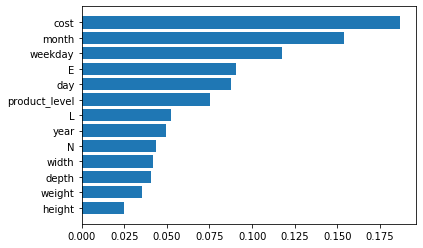

In [63]:
res = sorted(zip(features, importances), key=lambda x: x[1])
d = dict(res)

plt.barh(range(len(importances)), d.values())
plt.yticks(range(len(importances)), d.keys())
res[::-1]

### 5.3 suggestions to business

**The cost, purchase_date, the weight and size (width, depth and height) of the product, and also the product type (especialy E, L and N) are most important features can affect the price.**